In [1]:
import numpy as np
import torch
import os

def generate_sine_wave(shape, frequency, amplitude, phase):
    """Generate a 3D sine wave pattern."""
    x = np.linspace(0, 2 * np.pi, shape[0])
    y = np.linspace(0, 2 * np.pi, shape[1])
    z = np.linspace(0, 2 * np.pi, shape[2])
    X, Y, Z = np.meshgrid(x, y, z, indexing='ij')
    sine_wave = amplitude * np.sin(frequency * (X + Y + Z) + phase)
    return sine_wave

def generate_linear_gradient(shape, start, end):
    """Generate a 3D linear gradient pattern."""
    gradient = np.linspace(start, end, num=shape[0])
    gradient = np.tile(gradient, (shape[1], shape[2], 1)).T
    return gradient

def add_noise(data, noise_level):
    """Add random noise to the data."""
    noise = noise_level * np.random.randn(*data.shape)
    return data + noise

def generate_synthetic_data(shape, num_samples, noise_level=0.1):
    """Generate synthetic 3D CFD data with regular patterns and variations."""
    data = []
    for _ in range(num_samples):
        frequency = np.random.uniform(0.5, 2.0)  # Random frequency between 0.5 and 2.0
        amplitude = np.random.uniform(0.5, 2.0)  # Random amplitude between 0.5 and 2.0
        phase = np.random.rand() * 2 * np.pi     # Random phase between 0 and 2*pi
        sine_wave = generate_sine_wave(shape, frequency, amplitude, phase)
        gradient = generate_linear_gradient(shape, start=0, end=1)
        combined_pattern = sine_wave + gradient
        noisy_pattern = add_noise(combined_pattern, noise_level)
        data.append(noisy_pattern)
    return np.array(data)

def save_data_as_pt(data, directory, prefix):
    """Save the generated data as .pt files."""
    if not os.path.exists(directory):
        os.makedirs(directory)
    for i, sample in enumerate(data):
        tensor = torch.from_numpy(sample).float()
        torch.save(tensor, os.path.join(directory, f"{prefix}_{i}.pt"))

# Parameters
shape = (21, 21, 21)
num_samples = 100
noise_level = 0.1
output_directory = "synthetic_cfd_data"
file_prefix = "sample"

# Generate and save data
synthetic_data = generate_synthetic_data(shape, num_samples, noise_level)
save_data_as_pt(synthetic_data, output_directory, file_prefix)

print(f"Generated and saved {num_samples} samples in '{output_directory}' directory.")

Generated and saved 100 samples in 'synthetic_cfd_data' directory.


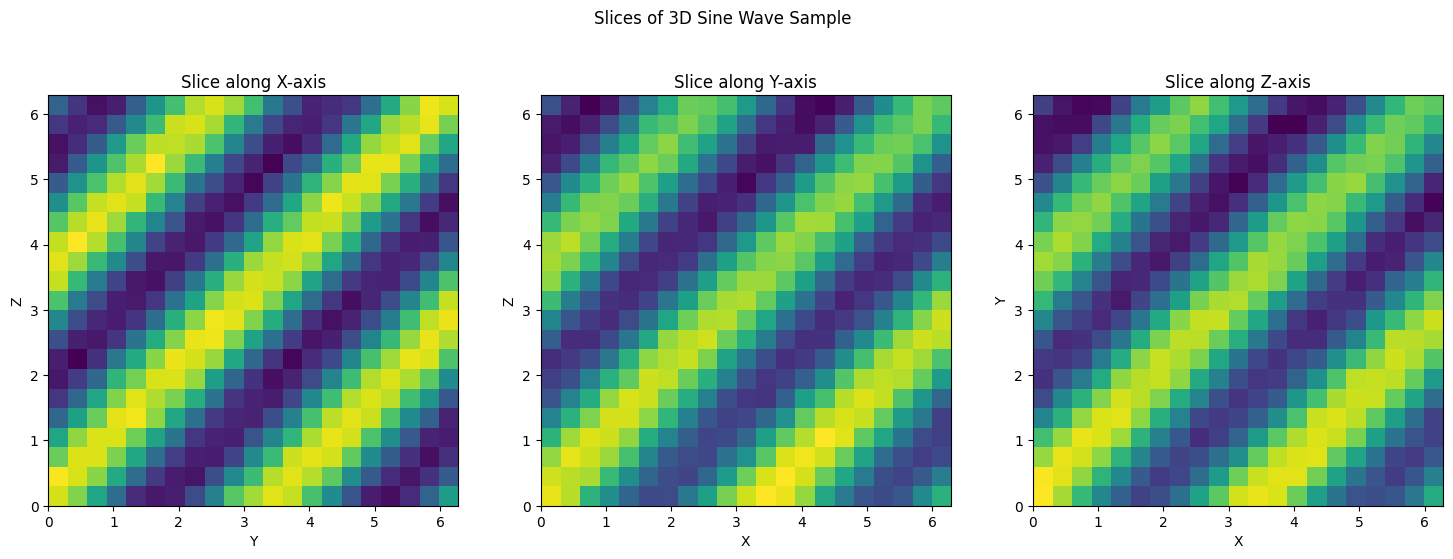

In [2]:
import matplotlib.pyplot as plt

# Select the first sample
sample = synthetic_data[90]

# Plot the sample
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Create a grid for the plot
x = np.linspace(0, 2 * np.pi, shape[0])
y = np.linspace(0, 2 * np.pi, shape[1])
z = np.linspace(0, 2 * np.pi, shape[2])
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Plot slices of the 3D volume
slices = [shape[0] // 2, shape[1] // 2, shape[2] // 2]
axes[0].imshow(sample[slices[0], :, :], cmap='viridis', extent=(0, 2 * np.pi, 0, 2 * np.pi))
axes[0].set_title('Slice along X-axis')
axes[0].set_xlabel('Y')
axes[0].set_ylabel('Z')

axes[1].imshow(sample[:, slices[1], :], cmap='viridis', extent=(0, 2 * np.pi, 0, 2 * np.pi))
axes[1].set_title('Slice along Y-axis')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Z')

axes[2].imshow(sample[:, :, slices[2]], cmap='viridis', extent=(0, 2 * np.pi, 0, 2 * np.pi))
axes[2].set_title('Slice along Z-axis')
axes[2].set_xlabel('X')
axes[2].set_ylabel('Y')

plt.suptitle('Slices of 3D Sine Wave Sample')
plt.show()

In [5]:
!pip install scikit-image

  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'error'


'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.
  ERROR: Command errored out with exit status 2:
   command: 'c:\users\apost\appdata\local\programs\python\python38-32\python.exe' 'c:\users\apost\appdata\local\programs\python\python38-32\lib\site-packages\pip' install --ignore-installed --no-user --prefix 'C:\Users\apost\AppData\Local\Temp\pip-build-env-vhq4phuj\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- 'meson-python>=0.13' wheel 'setuptools>=67' 'packaging>=21' 'Cython>=0.29.32' pythran 'lazy_loader>=0.2' 'numpy==1.22.3; python_version=='"'"'3.10'"'"' and platform_system=='"'"'Windows'"'"' and platform_python_implementation != '"'"'PyPy'"'"'' 'numpy==1.21.1; python_version=='"'"'3.8'"'"' and platform_python_implementation != '"'"'PyPy'"'"'' 'numpy==1.21.1; python_version=='"'"'3.9'"'"' and platform_python_implementation != '"'"'PyPy'"'"'' 'numpy==1.21.6; python_version=='"'"'3.

In [3]:
from datasets import CFD3DDataset 

# Define a custom transform (if needed)
def custom_transform(sample):
    # Example transform: normalize the sample
    return (sample - np.mean(sample)) / np.std(sample)

# Initialize the dataset
data_directory = output_directory  # Use the directory where synthetic data is saved
no_simulations = num_samples       # Number of samples generated
simulation_timesteps = 1           # Assuming each sample is a single timestep

# Create an instance of the CFD3DDataset
dataset = CFD3DDataset(data_directory=data_directory, 
                       no_simulations=no_simulations, 
                       simulation_timesteps=simulation_timesteps, 
                       transforms=custom_transform)

# Access a sample from the dataset
sample_idx = 0
sample = dataset[sample_idx]

# Print the shape of the sample
print(f"Sample {sample_idx} shape: {sample.shape}")

# If the sample is a tensor, convert it to a numpy array for visualization
if isinstance(sample, torch.Tensor):
    sample = sample.numpy()

# Plot the sample
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot slices of the 3D volume
slices = [shape[0] // 2, shape[1] // 2, shape[2] // 2]
axes[0].imshow(sample[slices[0], :, :], cmap='viridis', extent=(0, 2 * np.pi, 0, 2 * np.pi))
axes[0].set_title('Slice along X-axis')
axes[0].set_xlabel('Y')
axes[0].set_ylabel('Z')

axes[1].imshow(sample[:, slices[1], :], cmap='viridis', extent=(0, 2 * np.pi, 0, 2 * np.pi))
axes[1].set_title('Slice along Y-axis')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Z')

axes[2].imshow(sample[:, :, slices[2]], cmap='viridis', extent=(0, 2 * np.pi, 0, 2 * np.pi))
axes[2].set_title('Slice along Z-axis')
axes[2].set_xlabel('X')
axes[2].set_ylabel('Y')

plt.suptitle('Slices of 3D CFD Dataset Sample')
plt.show()

ModuleNotFoundError: No module named 'skimage'